## Computer vision 
### Automatic grading of single choice tests

####  You will receive an (scanned) image (see bellow) of a test.

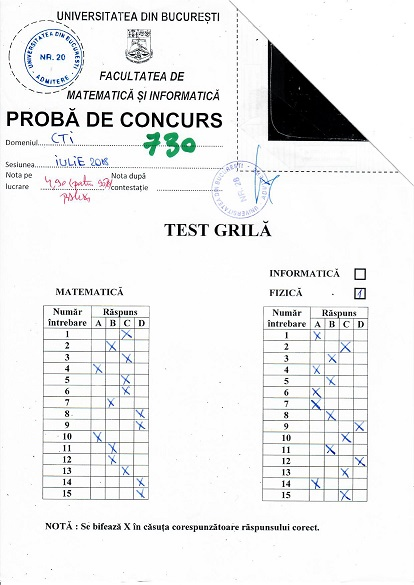

- The first thing we have to do is to take only the part of the image that is needed for grading (the part with the two tables). 
- After we have taken the part with the tables, we have to split the image in the left part (MATEMATICA) and the right part (INFORMATICA/FIZICA).

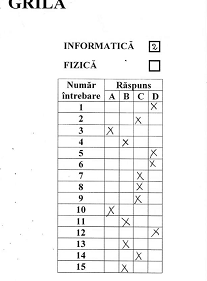

- Having the image from above, we have to find the lines and the columns that contain the student's answers.

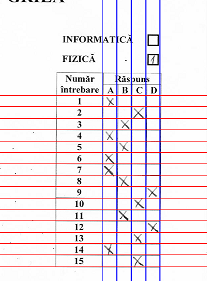

- After we have found the tables, we have to crop the tables in order to take only the student's answers.

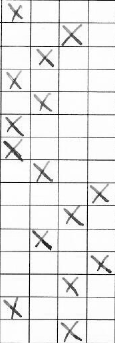


- A student can choose between INFORMATICA/FIZICA, our goal is to find the 2 boxes representing the number of the subject. 

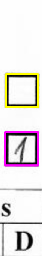

#### Download the images from [here.](http://tinyurl.com/CV-2020-Project1)

In [61]:
# Required libraries to be installed: Pillow, OpenCV
import cv2 as cv
import numpy as np
import glob
import os
import pickle
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image, display
import PIL.Image
import io

In [62]:
# read the name of the images
base_folder = '../../1st Project/Files/images'
images_names = glob.glob(os.path.join(base_folder, "image_*.jpg")) 
idx_image = -1
SHOW_INTERMEDIATE_RESULTS = True # set this to false in order to show only the final result
NUM_OF_SECONDS = 0 # set to 0 in order to wait until keypress

In [63]:
idx_image += 1 # run starting from here in order to test the next image :)

In [64]:
print("Detecting edges on the %d image..." % idx_image)

Detecting edges on the 0 image...


In [65]:
def show_image(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

(5847, 4132, 3)
(877, 620, 3)


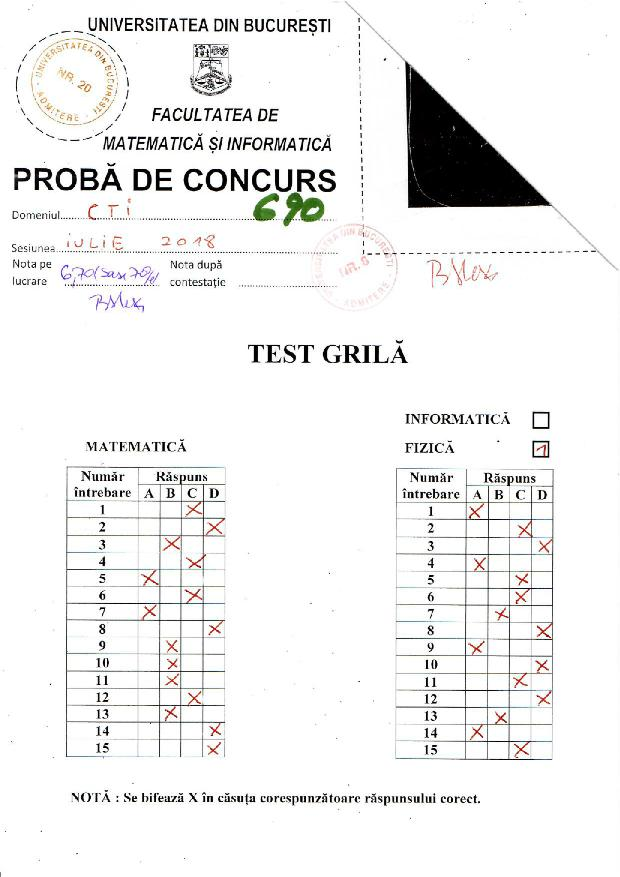

In [66]:
# read the idx-th image
image = cv.imread(images_names[idx_image])
#make it 0.15 times on every dimension
img = cv.resize(image, (0, 0), fx=0.15, fy=0.15)
print(image.shape)
print(img.shape)
# if SHOW_INTERMEDIATE_RESULTS:
#     cv.imshow("image", img)
#     cv.waitKey(NUM_OF_SECONDS)
#     cv.destroyAllWindows()
show_image(img)

(877, 620, 3)
<class 'int'>


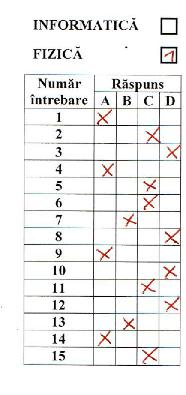

In [91]:
# take the lower part of the image
orig_h, orig_w, _ = img.shape
print(img.shape)
print(type(orig_h))
img1 = img[int(0.45*orig_h):int(orig_h*0.90),int(orig_w * 0.6):int(orig_w * 0.9)]
# if SHOW_INTERMEDIATE_RESULTS:
#     cv.imshow("image", img1)
#     cv.waitKey(NUM_OF_SECONDS)
#     cv.destroyAllWindows()
show_image(img1)

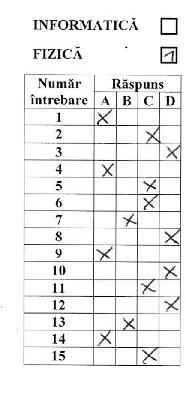

In [92]:
#make it grayscale
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
# if SHOW_INTERMEDIATE_RESULTS:
#     cv.imshow("image", img1_gray)
#     cv.waitKey(NUM_OF_SECONDS)
#     cv.destroyAllWindows()
show_image(img1_gray)

237.76461140601606


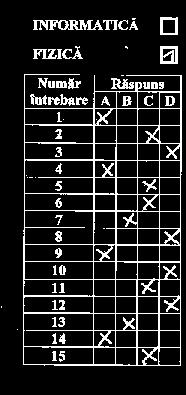

In [93]:
#obtain a binary image by applying an adaptive threshold = mean value of img1_gray
meanValue = img1_gray.mean()
print(meanValue)
_, img1_th = cv.threshold(img1_gray,meanValue, 255, cv.THRESH_BINARY_INV) # the second params is the threshold
# cv.imshow("image", img1_th)
# cv.waitKey(NUM_OF_SECONDS)
# cv.destroyAllWindows()
show_image(img1_th)

In [94]:
#define a vertical kernel and filter the binary image
kernel = np.array([[0,1,0],[0,1,0],[0,1,0]])                
print(kernel.sum())
kernel = kernel/kernel.sum()
print(kernel)
print(kernel.sum())

3
[[0.         0.33333333 0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.33333333 0.        ]]
1.0


In [95]:
thresholded = img1_th
filtered = 255 - cv.filter2D(255 - thresholded, -1, kernel)
filtered[filtered < 255] = 0
filtered_vertical = filtered

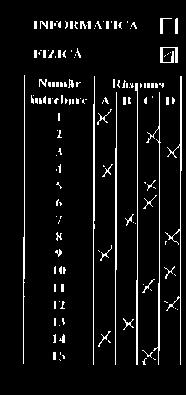

In [96]:
# if SHOW_INTERMEDIATE_RESULTS:
#     cv.imshow("image", filtered_vertical)
#     cv.waitKey(NUM_OF_SECONDS)
#     cv.destroyAllWindows()
show_image(filtered_vertical)

[[0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]]
11
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]]
1.0


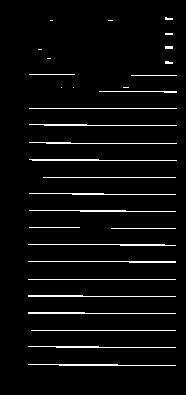

In [97]:
#define a horizontal kernel and filter the binary image
kernel = np.array([11*[0],11*[1],11*[0]]) 
print(kernel)
#kernel=np.transpose(kernel)
print(kernel.sum())
kernel = kernel/kernel.sum()
print(kernel)
print(kernel.sum())
thresholded = img1_th
filtered = 255 - cv.filter2D(255 - thresholded, -1, kernel)
filtered[filtered < 255] = 0
filtered_horizontal = filtered
# if SHOW_INTERMEDIATE_RESULTS:
#     cv.imshow("image", filtered_horizontal)
#     cv.waitKey(NUM_OF_SECONDS)
#     cv.destroyAllWindows()
show_image(filtered_horizontal)

In [98]:
#find horizontal lines
mask = filtered_horizontal // 255
print(mask.min())
print(mask.max())
res = np.sum(mask, axis=1) 
print(res.shape)
print(res)
res = res.argsort() 
print(res)

0
1
(395,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
   8   8   8   0   0   0   0   0   0   0   0   0   0   0   0   8   8   0
   0   0   0   0   0   0   0   0   0   0   8   8   8   4   0   0   0   0
   0   0   0   0   4   0   0   4   8   8   0   0   0   0   0   0   0   0
   0   0  46  46   0   0   0   0   0   0   0   0   0   0   0   8   0   0
   0  78  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 148   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  58 133
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  42 131
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  70 145   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 133   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  75 104   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  97  96   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  51  65   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0

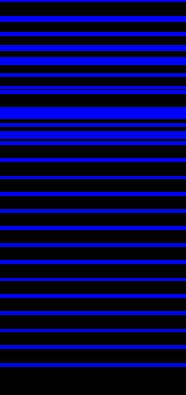

In [99]:
num_lines = 60
h_img = np.dstack((filtered_horizontal, filtered_horizontal, filtered_horizontal))
lines = [] #  _ x 
for i in range(num_lines+1):
    cv.line(h_img, (0, res[-i]), (h_img.shape[1], res[-i]), (0, 0, 255), 2) 
    lines.append([(0, res[-i]), (h_img.shape[1], res[-i])])
        
# if SHOW_INTERMEDIATE_RESULTS:
#     cv.imshow("h_img", h_img)
#     cv.waitKey(NUM_OF_SECONDS)
#     cv.destroyAllWindows()
show_image(h_img)

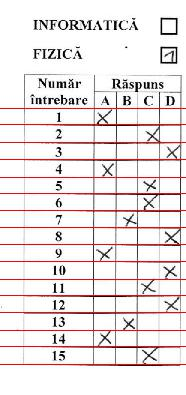

In [100]:
# sort only on y0 !!! only
lines.sort(key=lambda coords: coords[0][1])
    
threshold_same_line = 15
distinct_lines = []   
distinct_lines.append(lines[0])
     
for line in lines:  
    if line[0][1] - distinct_lines[-1][0][1] > threshold_same_line:
        distinct_lines.append(line)   
    
# take the last 16 lines
correct_lines = distinct_lines[-16:] 
color_image = np.dstack((img1_gray, img1_gray, img1_gray))
for line in correct_lines: 
    cv.line(color_image, line[0], line[1], (255, 0, 0), 1) 
        
# if SHOW_INTERMEDIATE_RESULTS:
#     cv.imshow("Detected lines", color_image)
#     cv.waitKey(NUM_OF_SECONDS)
#     cv.destroyAllWindows()
show_image(color_image)